In [1]:
#!pip install soundfile

In [2]:
#!pip install librosa

In [3]:
#!pip install kaggle

In [4]:
#UPLOAD your kaggle.json file

In [5]:
#!mkdir -p ~/.kaggle
#!cp kaggle.json ~/.kaggle/
#!chmod 600 ~/.kaggle/kaggle.json

In [6]:
# download the data

In [7]:
# kaggle datasets download -d uwrfkaggler/ravdess-emotional-speech-audio

In [8]:
#!kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess

In [9]:
# from zipfile import ZipFile

# zipped_dataset_path = './toronto-emotional-speech-set-tess.zip'
# with ZipFile(zipped_dataset_path, 'r') as zip:
#     zip.extractall(path='./data/toronto-emotional-speech-set-tess')
#     print('Successfully extracted the dataset.')

In [25]:
import librosa
import pandas as pd 
import numpy as np
import os
import platform
import glob
import time
import seaborn as sns
import IPython.display as ipd
from tqdm import tqdm
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix, ConfusionMatrixDisplay, accuracy_score, recall_score, classification_report, cohen_kappa_score

In [2]:
Ravdess='./data/ravdess-emotional-speech-audio/audio_speech_actors_01-24/'

In [3]:
ravdess_directory_list=os.listdir(Ravdess)


file_emotion=[]
file_path=[]

for dir in ravdess_directory_list:
    actor=os.listdir(Ravdess + dir)
    for file in actor:
        part=file.split('.')[0]
        part=part.split('-')
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess + dir + '/' + file)
        
emotion_df=pd.DataFrame(file_emotion, columns=['Emotions'])

path_df=pd.DataFrame(file_path, columns=['Path'])
Ravdess_df=pd.concat([emotion_df,path_df],axis=1)

Ravdess_df.Emotions.replace({1:'Neutral', 2:'Calm', 3:'Happy', 4:'Sad', 5:'Angry', 6:'Fearful', 7:'Disgust', 8:'Surprised'}, inplace=True)
Ravdess_df.tail()

,Emotions,Path
1435,Surprised,./data/ravdess-emotional-speech-audio/audio_sp...
1436,Surprised,./data/ravdess-emotional-speech-audio/audio_sp...
1437,Surprised,./data/ravdess-emotional-speech-audio/audio_sp...
1438,Surprised,./data/ravdess-emotional-speech-audio/audio_sp...
1439,Surprised,./data/ravdess-emotional-speech-audio/audio_sp...


In [4]:
from plotly import express as px
import plotly 

fig=px.histogram(Ravdess_df,x='Emotions',title='Total number of emotions')
fig.update_layout(xaxis_title='Emotions',yaxis_title='Count',showlegend=False)
#fig.update_traces(marker_color='steelblue')
fig.show()

In [14]:
# plotly.offline.plot(fig, filename='Emotions_count_histogram.html')

First 20 values of y:[-1.6893897e-06 -1.3083032e-05 -1.8255726e-07  1.2910635e-06
 -2.3670905e-06  4.1234516e-06 -1.1606148e-05 -6.5075728e-06
 -1.8186682e-05 -7.4499030e-06 -6.8137829e-06 -2.3397011e-05
  1.5532059e-06 -3.6600898e-07  8.2831747e-08 -3.9027387e-07
  1.6319146e-06 -8.4465164e-06 -9.0837812e-06  3.3813826e-06]
Shape of y: (73574,)
Sample rate: 22050
The file duration is 3.336689342403628 seconds


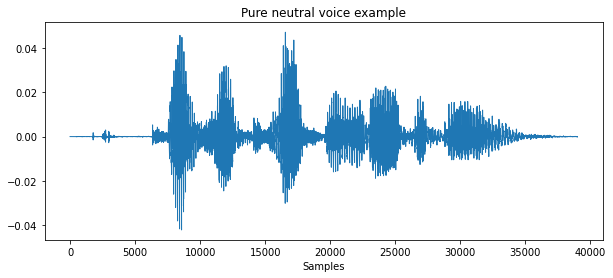

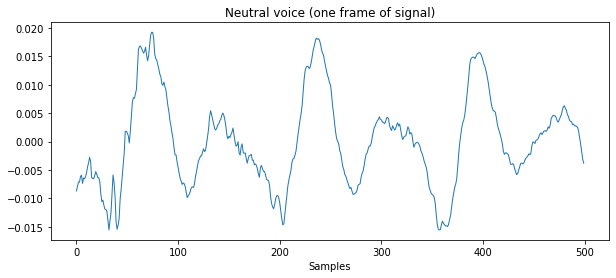

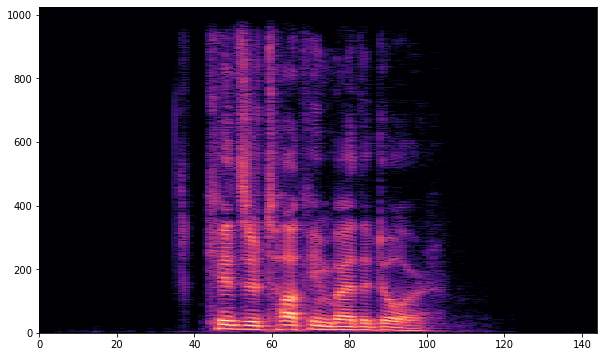

In [16]:
emotion='Neutral'
path=np.array(Ravdess_df.Path[Ravdess_df.Emotions==emotion])[1]

y, sr= librosa.load(path)
print(f'First 20 values of y:{y[:20]}') #Means almost first 20 ms
print(f'Shape of y: {y.shape}')
print(f'Sample rate: {sr}')
duration=librosa.get_duration(y=y,sr=sr)
print(f'The file duration is {duration} seconds')
pd.Series(y[16000:55000]).plot(figsize=(10,4),lw=1,title='Pure neutral voice example',xlabel='Samples')
plt.show()
pd.Series(y[25000:25500]).plot(figsize=(10,4), lw=1, title='Neutral voice (one frame of signal)',xlabel='Samples')
plt.show()
#Spectogram and a mathematical parts.
Y=librosa.stft(y)           #Fourier transform here
S_db=librosa.amplitude_to_db(np.abs(Y), ref=np.max) #Changing ampitude to decibel.
a,ax=plt.subplots(figsize=(10,6))

# img=librosa.display.specshow(S_db,
#                             x_axis='time',
#                             y_axis='log',#wave form after transformation.
#                             #y_axis='linear',
#                             #y_axis='mel',
#                             ax=ax)
# ax.set_title('Spectogram of Neutral voice (freq in log scale)', fontsize=14)
# a.colorbar(img, ax=ax,format=f'%0.2f')
plt.pcolor(S_db,cmap='magma',shading='flat')
plt.show()
ipd.Audio(path)
#Each difference in the graph at the end carries an attribute. Think of it like pixels in pictures

First 20 values of y:[ 1.2794685e-05  1.2233285e-06 -1.1867043e-06  1.1147084e-06
 -1.0082633e-06  8.6964928e-07 -7.0253861e-07  5.1207297e-07
 -3.0491117e-07  8.9274522e-08  1.2502984e-07 -3.2667654e-07
  5.0303055e-07 -6.4038812e-07  7.2463178e-07 -7.4174289e-07
  6.7852505e-07 -5.2316364e-07  2.6587938e-07  1.0177264e-07]
Shape of y: (86817,)
Sample rate: 22050
The file duration is 3.937278911564626 seconds


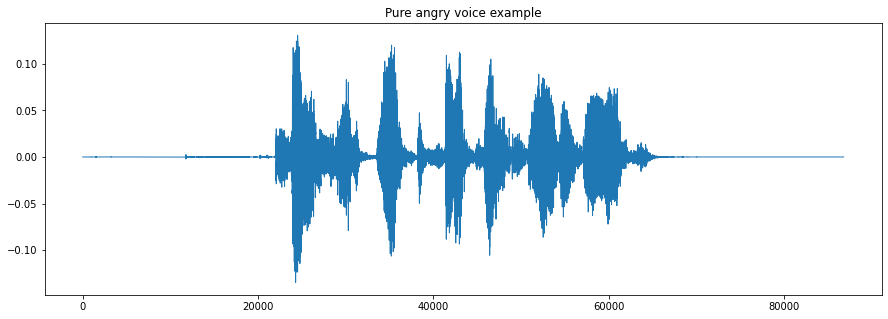

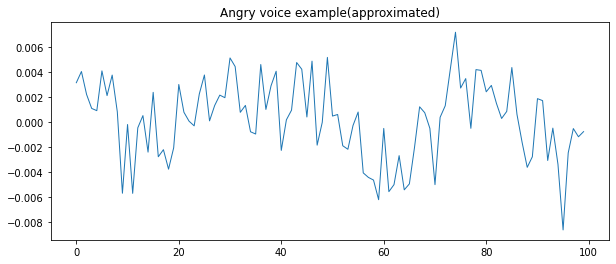

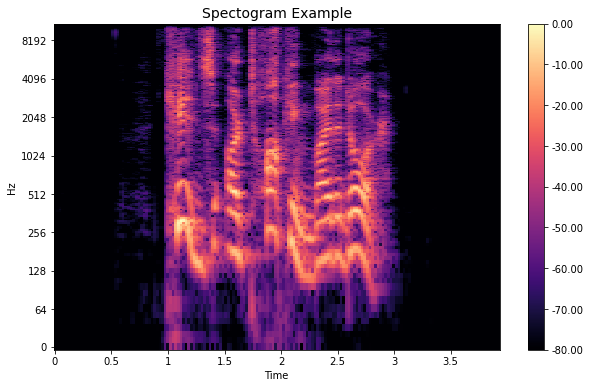

In [40]:
emotion='Angry'
path=np.array(Ravdess_df.Path[Ravdess_df.Emotions==emotion])[1]

y, sr= librosa.load(path)
print(f'First 20 values of y:{y[:20]}') #Means almost first 20 ms
print(f'Shape of y: {y.shape}')
print(f'Sample rate: {sr}')
duration=librosa.get_duration(y=y,sr=sr)
print(f'The file duration is {duration} seconds')
pd.Series(y).plot(figsize=(15,5),lw=1,title='Pure angry voice example')
plt.show()
pd.Series(y[40000:40100]).plot(figsize=(10,4), lw=1, title='Angry voice example(approximated)')
plt.show()
#Spectogram and a mathematical parts.
d=librosa.stft(y) #Fourier transform here
S_db=librosa.amplitude_to_db(np.abs(d), ref=np.max) #Changing ampitude to decibel.
a,ax=plt.subplots(figsize=(10,6))
img=librosa.display.specshow(S_db,
                            x_axis='time',
                            y_axis='log',#wave form after transformation.
                            ax=ax)
ax.set_title('Spectogram Example', fontsize=14)
a.colorbar(img, ax=ax,format=f'%0.2f')
plt.show()
ipd.Audio(path)
#Each difference in the graph at the end carries an attribute. Think of it like pixels in pictures

In [17]:
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fear',
  '07':'disgust',
  '08':'surprised'
}

#defined tess emotions to test on TESS dataset only
tess_emotions=['angry','disgust','fear','ps','happy','sad']

##defined RAVDESS emotions to test on RAVDESS dataset only
ravdess_emotions=['neutral','calm','angry', 'happy','disgust','sad','fear','surprised']

observed_emotions = ['sad','angry','happy','disgust','surprised','neutral','calm','fear']

## Feature extraction </p>
Using librosa package we can extract the MFCC features. This function loads the file give the file path and after resampling and computing MFCC features, returns the features. We have selected the no. of MFCCs as 40.

In [18]:
def extract_feature(file_name, mfcc):
    X, sample_rate = librosa.load(file_name)
    if mfcc:
        mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
        result=np.hstack((mfccs))
        return result
    else:
        return None

In [19]:
def dataset_options():
    # choose datasets
    ravdess = True
    tess = False
    ravdess_speech = False
    ravdess_song = False
    data = {'ravdess':ravdess, 'ravdess_speech':ravdess_speech, 'ravdess_song':ravdess_song, 'tess':tess}
    print(data)
    return data

In [41]:
def load_data(): 
    x,y=[],[]
    
    # feature to extract
    mfcc = True
    
    data = dataset_options()
    paths = []
    if data['ravdess']:
        if platform.system() == "Windows":
            paths.append("data/ravdess-emotional-speech-audio/audio_speech_actors_01-24/**/*.wav")
        else:    
            paths.append("./data/ravdess-emotional-*/audio_*_actors_01-24/*/Actor_*/*.wav")
    elif data['ravdess_speech']:
        paths.append("./data/ravdess-emotional-speech-audio/audio_speech_actors_01-24/Actor_*/*.wav")
    elif data['ravdess_song']:
        paths.append("./data/ravdess-emotional-song-audio/audio_song_actors_01-24/Actor_*/*.wav")

    for path in paths:
        for file in glob.glob(path):
            file_name=os.path.basename(file)
            emotion=emotions[file_name.split("-")[2]] #to get emotion according to filename. dictionary emotions is defined above.
            if emotion not in observed_emotions: #options observed_emotions - RAVDESS and TESS, ravdess_emotions for RAVDESS only
                continue
            feature=extract_feature(file, mfcc)
            x.append(feature)
            y.append(emotion)
    if data['tess']:
        for file in glob.glob("./data/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/*AF_*/*.wav"):
            file_name=os.path.basename(file)
            emotion=file_name.split("_")[2][:-4] #split and remove .wav
            if emotion == 'ps':
                emotion = 'surprised'
            if emotion not in observed_emotions: #options observed_emotions - RAVDESS and TESS, ravdess_emotions for RAVDESS only
                continue
            feature=extract_feature(file, mfcc)
            x.append(feature)
            y.append(emotion)
    return {"X":x,"y":y}

In [42]:
start_time = time.time()

Trial_dict = load_data()

print("--- Data loaded. Loading time: %s seconds ---" % (time.time() - start_time))
X = pd.DataFrame(Trial_dict["X"])
y = pd.DataFrame(Trial_dict["y"])

print("X.shape = ",X.shape)
print("y.shape = ",y.shape)

{'ravdess': True, 'ravdess_speech': False, 'ravdess_song': False, 'tess': False}
--- Data loaded. Loading time: 327.94281578063965 seconds ---
X.shape =  (1440, 40)
y.shape =  (1440, 1)


In [44]:
#renaming the label column to emotion
y=y.rename(columns= {0: 'emotion'})

In [45]:
#concatinating the attributes and label into a single dataframe
data = pd.concat([X, y], axis =1)

In [46]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,emotion
0,-698.799194,56.315948,-0.757289,13.847861,6.334058,1.915105,-4.582171,-1.815899,-12.295862,-1.558625,...,-1.849002,-2.936620,-1.657384,-3.339769,-1.452636,-1.143102,-1.756764,-3.477430,-1.596949,neutral
1,-693.967957,56.939384,-3.118749,17.600218,7.268784,1.388207,-2.889719,-3.798503,-13.093157,0.094004,...,-2.256578,-2.515828,-2.135478,-3.298966,-0.569183,-1.483193,-2.935230,-3.321975,-2.232724,neutral
2,-692.557861,59.399082,-1.210158,14.986337,4.023637,2.498614,-3.402220,-4.083977,-11.608171,-2.412600,...,-1.833379,-2.652212,-1.688799,-2.937205,-1.846720,-1.198468,-2.672875,-3.530264,-2.258925,neutral
3,-686.096130,57.283222,1.384294,14.643025,5.609860,4.346780,-2.934152,-5.633861,-11.653029,-1.992216,...,-1.837304,-3.166418,-2.527576,-3.437237,-1.296383,-1.075369,-2.364810,-3.469552,-3.350949,neutral
4,-728.250427,63.978127,1.503606,16.672989,6.537086,3.505901,-4.833341,-2.226708,-11.258503,-3.375773,...,-0.830043,-2.229644,-2.155182,-1.988890,-0.246562,-1.917958,-1.638944,-3.897849,-2.711946,calm


## Shuffling data # reindexing to shuffle the data at random
data = data.reindex(np.random.permutation(data.index))

In [47]:
#reindexing to shuffle the data at random
data = data.reindex(np.random.permutation(data.index))

In [48]:
# Storing shuffled ravdess and tess data to avoid loading again
data.to_csv('./data/ravtess_speech_toronto_combined_dataset_mv_27042023.csv')

In [53]:
starting_time = time.time()
data = pd.read_csv("./data/ravtess_speech_toronto_combined_dataset_mv_27042023.csv")

print("data loaded in " + str(time.time()-starting_time) + "ms")

print(data.head())
print("data.shape = ",data.shape)
print("data.columns = ",data.columns)

data loaded in 0.02402210235595703ms
   Unnamed: 0          0          1          2          3          4  \
0          28 -547.30493  44.200382  -7.698258  14.314753  -3.064451   
1        1085 -745.72955  74.935940  21.956066  28.514643  12.948763   
2        1262 -689.62970  54.763126  -0.822783   3.280186   1.897317   
3         929 -485.29358  38.815453  -6.139562   6.403797  -7.533392   
4        1428 -609.86206  55.874176 -12.270983   0.797629 -19.799803   

           5          6          7          8  ...        31        32  \
0  -1.154054  -5.933641   0.137766 -14.025714  ...  0.055749 -2.562422   
1  15.499494  -1.484835   2.640134  -6.069380  ... -0.677001  0.239905   
2   0.597324 -10.684502  -8.422439 -11.937144  ...  3.636212  0.254568   
3  -6.981079  -5.650959  -7.396293 -12.891734  ...  4.034816  0.490841   
4  -6.321277 -13.306941 -14.632302 -11.185981  ... -0.212645 -2.035596   

         33        34        35        36        37        38        39  \
0 -1.37015

In [54]:
#dropping the column Unnamed: 0 to removed shuffled index
data = data.drop('Unnamed: 0',axis=1)

In [55]:
data.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', 'emotion'],
      dtype='object')

In [56]:
#separating features and target outputs
X = data.drop('emotion', axis = 1).values
y = data['emotion'].values

In [57]:
y

array(['angry', 'calm', 'neutral', ..., 'fear', 'angry', 'sad'],
      dtype=object)

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [59]:
X.shape, y.shape

((1440, 40), (1440,))

In [60]:
np.unique(y)

array(['angry', 'calm', 'disgust', 'fear', 'happy', 'neutral', 'sad',
       'surprised'], dtype=object)

X variable contains attributes while y variable contains corresponding labels.

Once the data is divided into attributes and labels, the final preprocessing step is to divide data into training and test sets. The model_selection library of the Scikit-Learn library contains the train_test_split method that allows us to divide data into training and test sets.

In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

It is the time to train our SVM on the training data. Scikit-Learn contains the svm library, which contains built-in classes for different SVM algorithms. Since we are going to perform a classification task, we will use the support vector classifier class, which is written as SVC in the Scikit-Learn's svm library. We have set the kernel to linear.

In [62]:
from sklearn.svm import SVC

svclassifier = SVC(kernel = 'linear')

In [63]:
import time

starting_time = time.time()
svclassifier.fit(X_train, y_train)
print("Trained model in %s ms " % str(time.time() - starting_time))

Trained model in 25.26949429512024 ms 


In [65]:
y_pred = svclassifier.predict(X_test)

Confusion matrix, precision, recall, and F1 measures are the most commonly used metrics for classification tasks. Scikit-Learn's metrics library contains the classification_report and confusion_matrix methods, which can be readily used to find out the values for these important metrics. We have used the following code for finding these metrics:

In [88]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import seaborn as sn

print(classification_report(y_test,y_pred))

acc = float(accuracy_score(y_test,y_pred))*100
print("----accuracy score %s ----" % acc)

              precision    recall  f1-score   support

       angry       0.59      0.70      0.64        64
        calm       0.55      0.71      0.62        68
     disgust       0.47      0.42      0.44        57
        fear       0.44      0.53      0.48        47
       happy       0.41      0.31      0.35        59
     neutral       0.24      0.18      0.21        22
         sad       0.34      0.29      0.31        63
   surprised       0.57      0.50      0.53        52

    accuracy                           0.48       432
   macro avg       0.45      0.45      0.45       432
weighted avg       0.47      0.48      0.47       432

----accuracy score 48.148148148148145 ----


# Confusion matrix

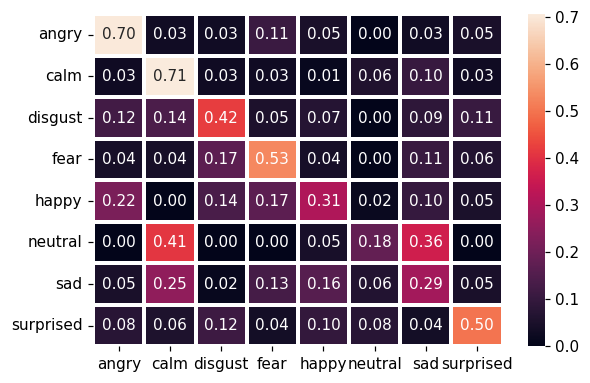

In [93]:
cm = confusion_matrix(y_test,y_pred,normalize='true',labels=labels)

df_cm = pd.DataFrame(cm,columns = labels, index = labels)
fig,ax = plt.subplots(dpi = 110)
sn.heatmap(df_cm, annot=True, fmt='.2f',linewidth=1.5)
plt.show()

In [95]:
mcm = multilabel_confusion_matrix(y_test, y_pred,
                            labels=labels)
mcm

array([[[337,  31],
        [ 19,  45]],

       [[324,  40],
        [ 20,  48]],

       [[348,  27],
        [ 33,  24]],

       [[353,  32],
        [ 22,  25]],

       [[347,  26],
        [ 41,  18]],

       [[397,  13],
        [ 18,   4]],

       [[334,  35],
        [ 45,  18]],

       [[360,  20],
        [ 26,  26]]], dtype=int64)

In [96]:
import plotting_utils as plt_util

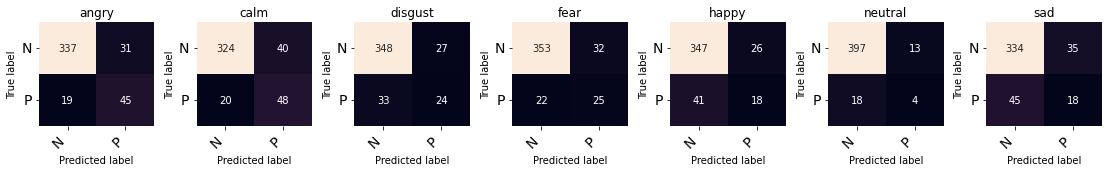

In [97]:
labels = np.unique(y)
#translated_labels = ['Гнев', 'Отвращение', 'Страх', 'Счастье', 'Нейтральность', 'Грусть', 'Удивление']
fig, ax = plt.subplots(1, 7, figsize=(15.5, 2.5))
for axes, cfs_matrix, label in zip(ax.flatten(), mcm, labels):
    plt_util.print_multiclass_confusion_matrix(cfs_matrix, axes, label, ["N", "P"])
fig.tight_layout()
plt.show()   

In [79]:
print(recall_score(y_test, y_pred, average="macro"))

0.45432401142904055


In [80]:
cm

array([[0.703125  , 0.03125   , 0.03125   , 0.109375  , 0.046875  ,
        0.        , 0.03125   , 0.046875  ],
       [0.02941176, 0.70588235, 0.02941176, 0.02941176, 0.01470588,
        0.05882353, 0.10294118, 0.02941176],
       [0.12280702, 0.14035088, 0.42105263, 0.05263158, 0.07017544,
        0.        , 0.0877193 , 0.10526316],
       [0.04255319, 0.04255319, 0.17021277, 0.53191489, 0.04255319,
        0.        , 0.10638298, 0.06382979],
       [0.22033898, 0.        , 0.13559322, 0.16949153, 0.30508475,
        0.01694915, 0.10169492, 0.05084746],
       [0.        , 0.40909091, 0.        , 0.        , 0.04545455,
        0.18181818, 0.36363636, 0.        ],
       [0.04761905, 0.25396825, 0.01587302, 0.12698413, 0.15873016,
        0.06349206, 0.28571429, 0.04761905],
       [0.07692308, 0.05769231, 0.11538462, 0.03846154, 0.09615385,
        0.07692308, 0.03846154, 0.5       ]])

## Random Forest

In [98]:
from sklearn.ensemble import RandomForestClassifier
  
 # create regressor object 
classifier = RandomForestClassifier(n_estimators = 100, random_state = 0) 
  
# fit the regressor with x and y data 
classifier.fit(X_train, y_train)   

c_p = classifier.predict(X_test) 


print(accuracy_score(y_true=y_test,y_pred=c_p))
print(classification_report(y_test,c_p)) 
# creating a confusion matrix 
print(confusion_matrix(y_test,c_p) )

0.5740740740740741
              precision    recall  f1-score   support

       angry       0.79      0.70      0.74        64
        calm       0.57      0.79      0.67        68
     disgust       0.53      0.58      0.55        57
        fear       0.49      0.55      0.52        47
       happy       0.53      0.39      0.45        59
     neutral       0.30      0.32      0.31        22
         sad       0.60      0.38      0.47        63
   surprised       0.60      0.69      0.64        52

    accuracy                           0.57       432
   macro avg       0.55      0.55      0.54       432
weighted avg       0.58      0.57      0.57       432

[[45  0  7  3  3  0  3  3]
 [ 0 54  1  0  2  8  3  0]
 [ 5  5 33  1  3  1  1  8]
 [ 0  3  8 26  2  1  4  3]
 [ 5  2  4 12 23  2  3  8]
 [ 0 13  0  1  0  7  1  0]
 [ 0 15  7  7  6  2 24  2]
 [ 2  2  2  3  4  2  1 36]]
